# Detailed transformation & linear regression with python

# Case Study: Customer Analysis Study [LAB] Week 2, Day 4 EDA

## Transformation & Anlaysis
The purpose of this Transformation & Linear Regression is to find insights and have predictive power through the target variable of the dataset. The input dependent feature contribute on accuracy to the linear regression model. Later in another notebook for Data cleaning/preparation/transformation the linear regression model will ultimately be replaced by powerful machine learning algorithms (in a model bag). We will proceed as follow:

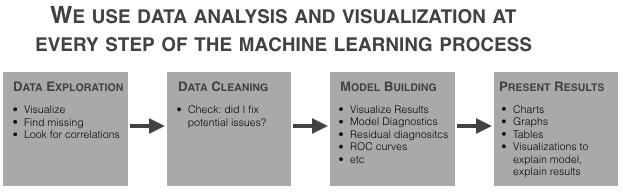

In [113]:
from  IPython.display import Image
Image("http://sharpsightlabs.com/wp-content/uploads/2016/05/1_data-analysis-for-ML_how-we-use-dataAnalysis_2016-05-16.png")

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [126]:
file = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')
colFile = file.columns.tolist()
print(colFile)
file.head(10)

['region', 'customer_lifetime_value', 'response', 'coverage', 'education', 'effective_to_date', 'month', 'employment_status', 'gender', 'income', 'location_code', 'marital_status', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size']


,region,customer_lifetime_value,response,coverage,education,effective_to_date,month,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,central,4809,no,basic,college,2/18/11,feb,employed,m,48029,...,52,0,9,corporate auto,corporate l3,offer3,agent,292,four-door car,medsize
1,west region,2228,no,basic,college,1/18/11,jan,unemployed,f,92260,...,26,0,1,personal auto,personal l3,offer4,call center,744,four-door car,medsize
2,east,14947,no,basic,bachelor,2/10/11,feb,employed,m,22139,...,31,0,2,personal auto,personal l3,offer3,call center,480,suv,medsize
3,north west,22332,yes,extended,college,1/11/11,jan,employed,m,49078,...,3,0,2,corporate auto,corporate l3,offer2,branch,484,four-door car,medsize
4,north west,9025,no,premium,bachelor,1/17/11,jan,medical leave,f,23675,...,31,0,7,personal auto,personal l2,offer1,branch,707,four-door car,medsize
5,west region,4745,yes,basic,high school or below,2/14/11,feb,employed,m,50549,...,73,0,7,personal auto,personal l3,offer1,agent,292,four-door car,medsize
6,west region,5035,no,basic,doctor,2/14/11,feb,employed,f,37405,...,99,3,4,corporate auto,corporate l2,offer2,branch,287,four-door car,medsize
7,west region,4956,no,basic,high school or below,2/24/11,feb,employed,m,87197,...,45,0,3,personal auto,personal l2,offer2,branch,247,two-door car,medsize
8,west region,5989,yes,premium,college,1/19/11,jan,employed,m,66839,...,24,0,1,personal auto,personal l1,offer2,branch,739,sports car,medsize
9,north west,17114,no,extended,master,1/4/11,jan,employed,f,70961,...,8,0,2,corporate auto,corporate l3,offer2,agent,408,four-door car,small


In [127]:
#check the data file for NaN count and datatypes
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

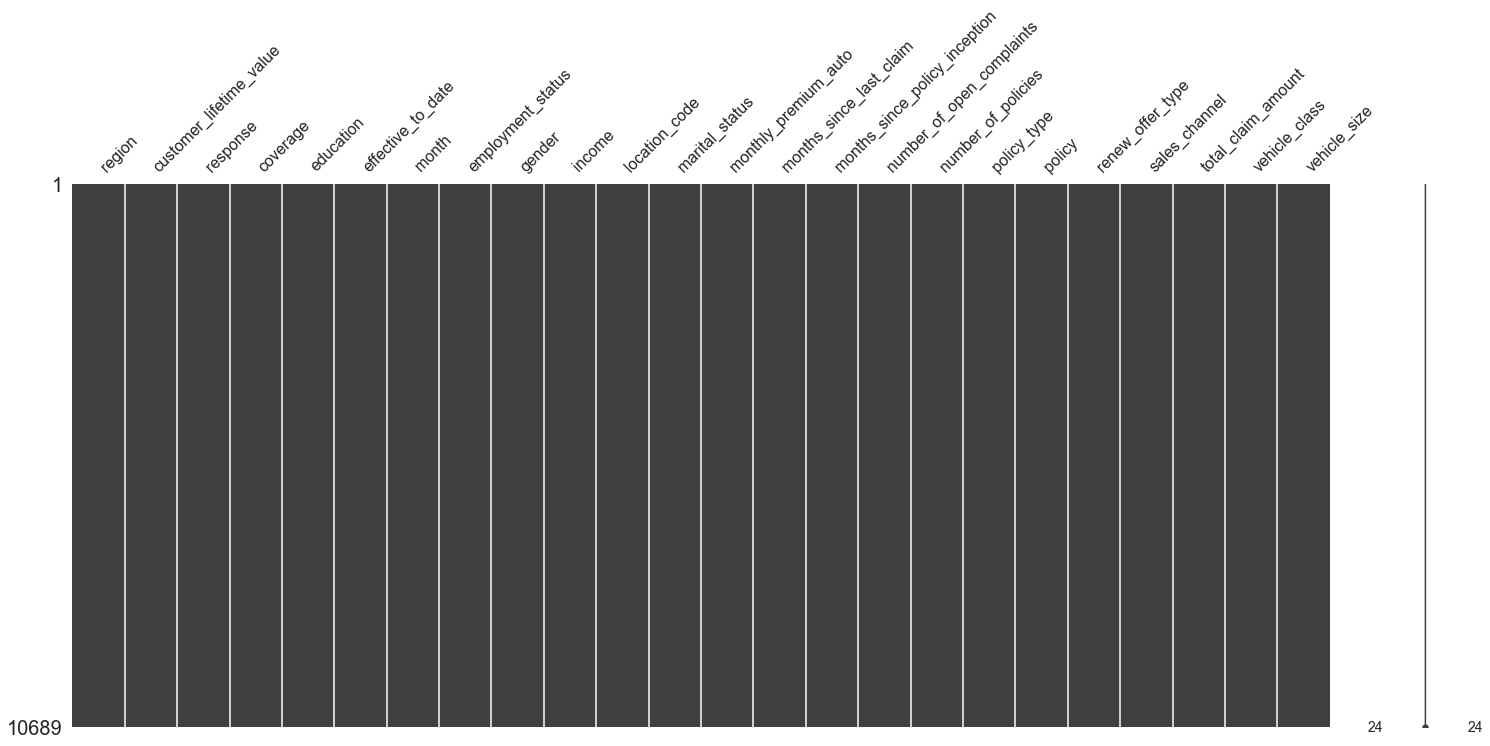

In [128]:
#This plot indicates missing values
msno.matrix(file)

**ANALYSIS TAKE-AWAY:** The file for the customer insurance first party data has no missing values.

In [129]:
#Check unique values of file
for i in colFile:
    print(file[i].unique())
#unique values look good!

['central' 'west region' 'east' 'north west']
[ 4809  2228 14947 ... 19228 23893 11971]
['no' 'yes']
['basic' 'extended' 'premium']
['college' 'bachelor' 'high school or below' 'doctor' 'master']
['2/18/11' '1/18/11' '2/10/11' '1/11/11' '1/17/11' '2/14/11' '2/24/11'
 '1/19/11' '1/4/11' '1/2/11' '2/7/11' '1/31/11' '1/26/11' '2/28/11'
 '1/16/11' '2/26/11' '2/23/11' '1/15/11' '2/2/11' '2/15/11' '1/24/11'
 '2/21/11' '2/22/11' '1/7/11' '1/28/11' '2/8/11' '2/12/11' '2/20/11'
 '1/5/11' '2/19/11' '1/3/11' '2/3/11' '1/22/11' '1/23/11' '2/5/11'
 '2/13/11' '1/25/11' '2/16/11' '2/1/11' '1/27/11' '1/12/11' '1/20/11'
 '2/6/11' '2/11/11' '1/21/11' '1/29/11' '1/9/11' '2/9/11' '2/27/11'
 '1/1/11' '2/17/11' '2/25/11' '1/13/11' '1/6/11' '2/4/11' '1/14/11'
 '1/10/11' '1/8/11' '1/30/11']
['feb' 'jan']
['employed' 'unemployed' 'medical leave' 'disabled' 'retired']
['m' 'f']
[48029 92260 22139 ... 39837 64195 68942]
['suburban' 'urban' 'rural']
['married' 'single' 'divorced']
[ 61  64 100  97 117  63 154  85

The unique values looking good! There are no apparent issues with the data.

# Case Study: Customer Analysis Study [LAB] Week 4, Day 2 Transformation & Linear Regression

Check if there are highly correlated features and drop them if there are any.

In [130]:
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707


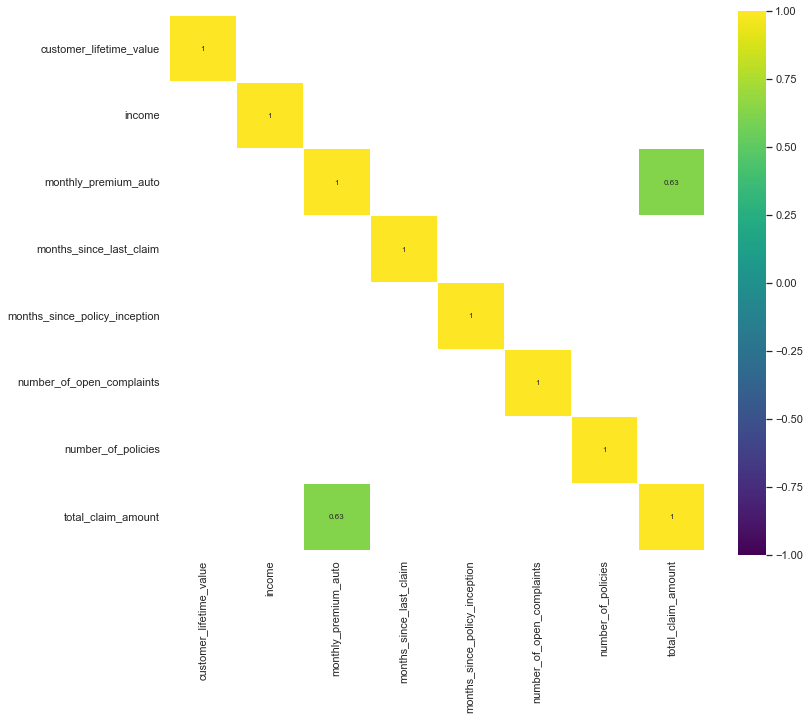

In [131]:
#Heatmap with feature-feature correlations
corr = numerical.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

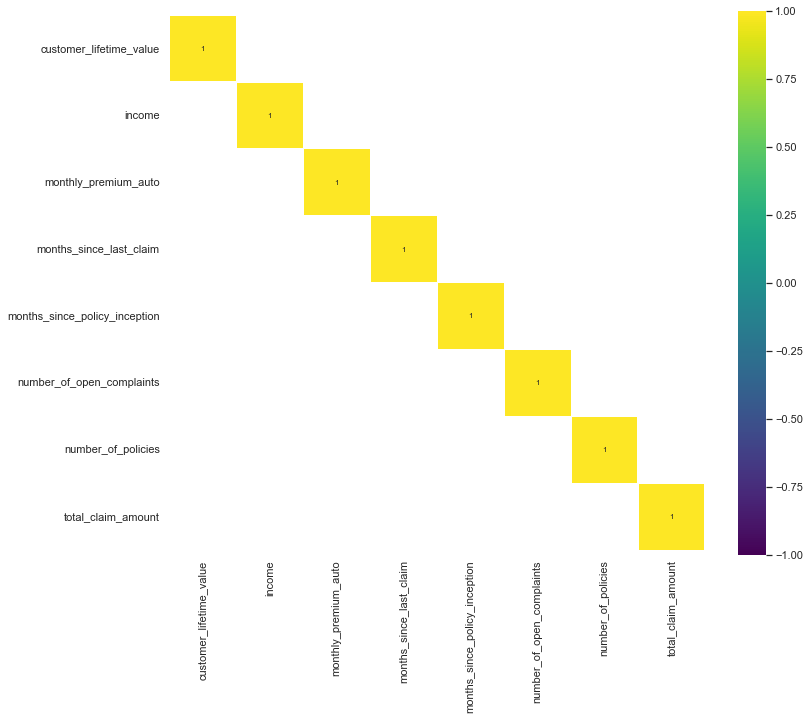

In [132]:
#Heatmap with highly correlated features numercical feature-feature correlations
corr = numerical.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.8)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [134]:
#Get only categorical values from file
categorical = file.select_dtypes(include = ['object'])
categorical.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [138]:
#Keep only nominal values from categeorical input features
categorical = categorical.drop('effective_to_date', axis=1)
categorical.head()

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [139]:
#Plot the Correlation Heatmap.
#One Hot/Label Encoding of the categorical variables in the categoricals 
#data frame that you created in Activity 4. ( Hint: check Dropfirst option).
categorical_dummies=pd.get_dummies(data=categorical)
categorical_dummies

,region_central,region_east,region_north west,region_west region,response_no,response_yes,coverage_basic,coverage_extended,coverage_premium,education_bachelor,...,sales_channel_web,vehicle_class_four-door car,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car,vehicle_size_large,vehicle_size_medsize,vehicle_size_small
0,1,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,1,0,0,0,1,0,0,0,1,1,...,1,0,1,0,0,0,0,0,1,0
10685,0,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
10686,1,0,0,0,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
10687,0,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


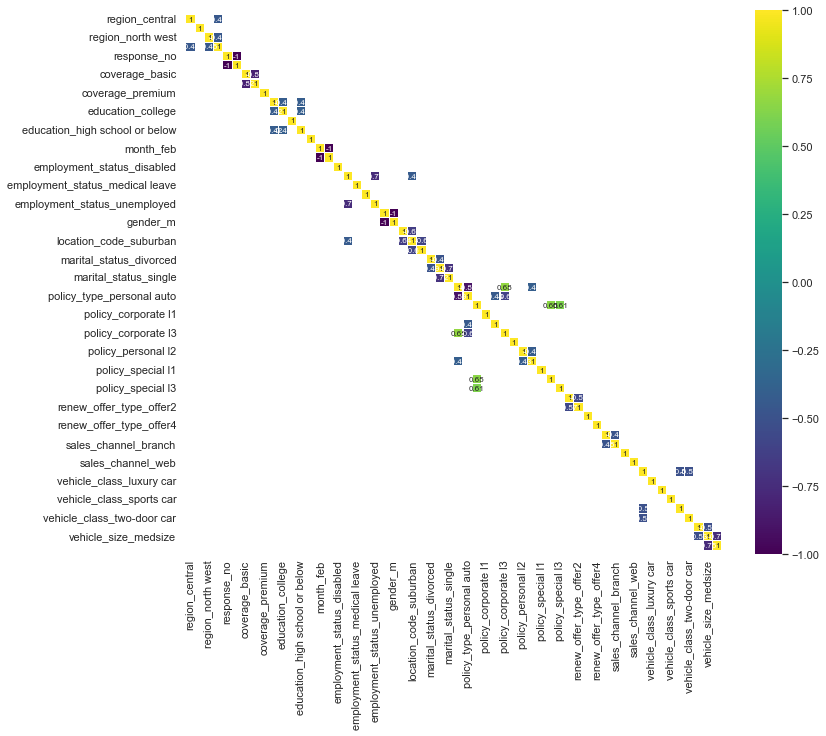

In [140]:
#Heatmap with categorical feature-feature correlations
corr = categorical_dummies.corr() # We already examined total_claim_amount correlations in numerical, now we analyse the categorical correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

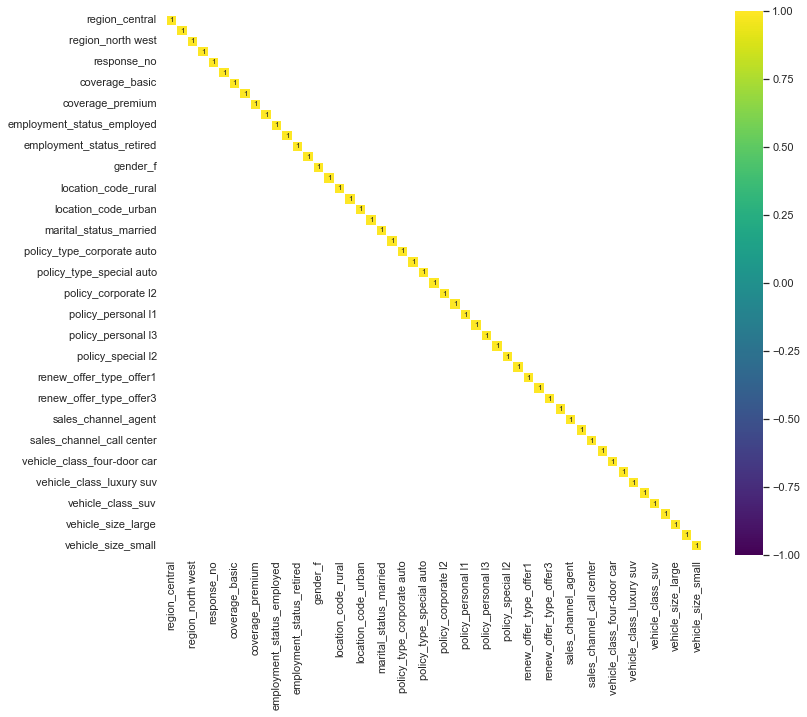

In [92]:
#Heatmap with highly categorical feature-feature correlations
corr = categorical_dummies.corr() # We already examined total_claim_amount correlations in numerical, now we analyse the categorical correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.8)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

**Analysis Take Away**: There are no highly correlated numerical or categorical input features.

# Linear Regression

## Predicitve Modelling
### X Y Split

In [101]:
X=file._get_numeric_data()
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...
10684,15563,61541,253,12,40,0,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [103]:
#X-y split (y is the target variable, which is the total claim amount)
X=numerical.drop('total_claim_amount', axis=1)
y=numerical.total_claim_amount

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd969abd6d0>,
      dtype=object)

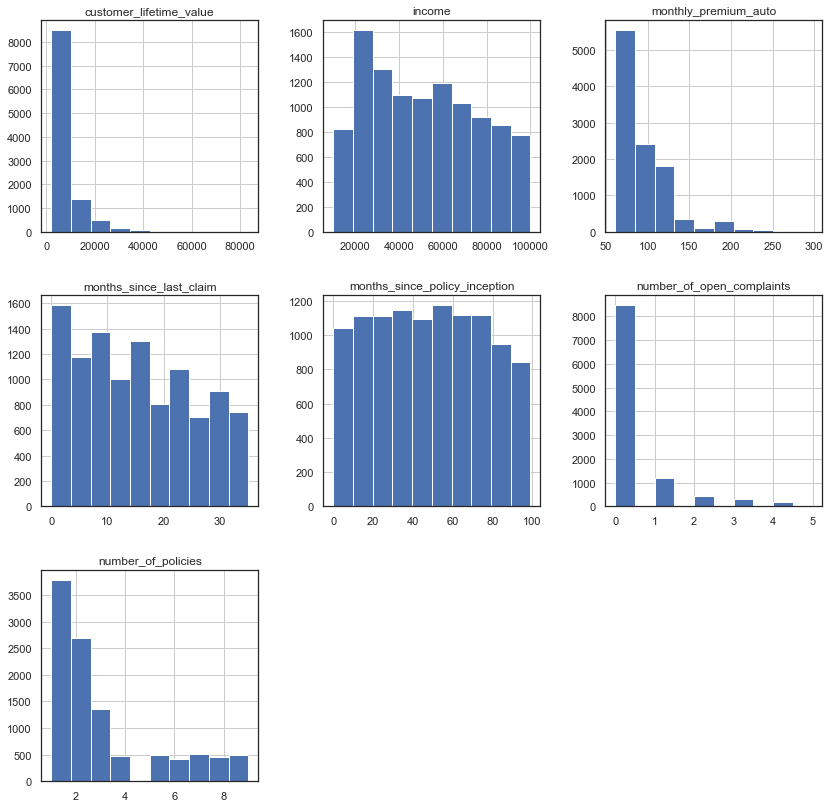

In [104]:
X.hist(figsize=(14,14))

In [105]:
y

0         292
1         744
2         480
3         484
4         707
         ... 
10684    1214
10685     273
10686     381
10687     618
10688    1021
Name: total_claim_amount, Length: 10689, dtype: int64

## Data Splitting

In [108]:
#Train-test split.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

## Standardize

In [109]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [110]:
X_train.shape

(7482, 7)

In [111]:
X_test_scaled=std_scaler.transform(X_test)

In [112]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.11021627 -1.27291744 -0.67143823 ...  1.36516733 -0.42500069
  -0.40381143]
 [-0.42794064  0.74729478 -0.72925469 ...  1.68786198 -0.42500069
   0.84759702]
 [-0.5223013   0.26592193  0.48489091 ...  0.50464827 -0.42500069
  -0.82094758]
 ...
 [-0.81132612 -1.17224873 -0.90270406 ... -1.39566466 -0.42500069
  -0.82094758]
 [ 2.25575772  0.98537142 -0.78707115 ... -1.61079442 -0.42500069
  -0.40381143]
 [ 1.18923585  0.68583346 -0.55580532 ...  0.21780858  1.78399907
  -0.40381143]]
--------
[[-0.40967729  1.58428551 -0.61362178 ...  1.54444214 -0.42500069
   2.51614162]
 [-0.7597249  -0.93947257 -0.64253    ...  0.755633    0.67949919
  -0.82094758]
 [ 0.57248529 -1.23371005 -0.90270406 ...  0.39708339 -0.42500069
  -0.40381143]
 ...
 [-0.79857077 -1.05867274 -0.58471355 ... -1.18053489 -0.42500069
  -0.82094758]
 [-0.42547654 -0.97370317 -0.81597938 ... -1.61079442  0.67949919
   0.43046087]
 [-0.49881985 -0.95695203  0.71615674 ... -1.00126009 -0.42500069
  -0.82094758]]
